In [1]:
# Please execute the main EDA and data cleaning file before running this code.

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
import math

import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.formula.api as smf

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
pd.set_option('display.float_format', '{:.5f}'.format)

### Read the dataframes for different product categories

In [5]:
# Reading the file having ad-spend data for inital linear model
df_ca = pd.read_csv('df_ca_weekly.csv', na_values=['', ' '])

In [6]:
print(df_ca.shape)

(52, 24)


### Building Linear model for Camera Accessories

In [7]:
df_ca.describe()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
count,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,...,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000
mean,53.36538,4185894.55557,4105.50451,6.15314,2021.20643,2.58136,1007.29252,49.26011,0.42308,0.42308,...,1543840.76699,37232774.87224,11798681.91896,17429725.45292,898076.92308,9235104.82407,48.84615,1158.62088,12.02599,2.55061
std,15.36105,1887275.07390,1905.03283,0.82435,336.55315,0.37992,207.90265,7.32440,0.49887,0.49887,...,2003283.63977,18207230.35372,5539460.02843,16713942.33327,1740809.39773,18260211.43660,3.82551,78.13649,8.98093,3.23694
min,27.00000,299.00000,1.00000,2.50000,744.50000,1.00000,299.00000,25.89655,0.00000,0.00000,...,14.28255,291841.88649,166383.18131,4980687.97045,0.00000,0.00000,44.00000,1015.00000,-7.26667,0.00000
25%,40.75000,3732459.94042,3172.39746,5.85705,1841.80846,2.44297,870.98765,45.26472,0.00000,0.00000,...,105188.12549,31737144.83639,9825343.22872,9816018.87664,0.00000,0.00000,46.00000,1092.21429,5.58167,0.24750
50%,53.50000,4249280.67317,4151.99277,6.21102,2038.87681,2.62299,1049.15970,48.52909,0.00000,0.00000,...,1071249.16783,44094605.01444,14151701.46642,11748304.10874,0.00000,0.00000,48.42857,1194.00000,12.16000,1.05000
75%,66.25000,4783937.47445,5177.78760,6.39932,2264.58071,2.72952,1172.82951,53.10193,1.00000,1.00000,...,2032258.06452,50910797.50203,15463054.32675,15603225.80645,1262903.22581,11260967.74194,50.00000,1222.00000,20.32500,3.84000
max,79.00000,11622828.56298,10305.50092,9.49372,2525.16073,4.00000,1319.98500,84.97487,1.00000,1.00000,...,7776942.99897,55033046.50298,16641935.48387,72093251.50133,6096774.19355,61170967.74194,59.00000,1242.00000,24.56667,12.80000


In [8]:
df_ca.head()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
0,27,18040.00000,28.00000,2.50000,1422.53571,2.67857,644.28571,47.92634,0,0,...,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000,54.00000,1177.00000,19.36000,0.00000
1,28,3477101.65688,2980.33123,7.03169,2262.48968,2.69158,1181.32677,43.00575,0,0,...,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000,54.00000,1177.00000,20.10000,4.41667
2,29,3852264.62237,3177.89181,6.41227,2322.91325,2.72632,1224.10207,43.99524,1,1,...,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000,54.00000,1177.00000,23.18333,1.40000
3,30,3741256.92908,3147.11152,6.43136,2270.85382,2.76202,1197.04128,42.92598,0,0,...,2106.54283,2997078.44038,1235734.52022,11343832.94059,0.00000,0.00000,54.00000,1177.00000,23.06000,0.90000
4,31,2550908.29393,2085.65431,6.38965,2224.95887,2.73268,1234.62521,42.19548,0,0,...,1508.75418,2224153.71070,930205.56625,9724368.78533,0.00000,0.00000,55.42857,1185.28571,24.56667,4.63333


In [9]:
df_ca.columns

Index(['week_number', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'List_Price', 'discount', 'pay_day_flag',
       'sale_day_flag', 'prepaid_frac', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
       'Other', 'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)'],
      dtype='object')

In [10]:
# taking all the numeric columns
numeric_variables = [ 'gmv', 'units', 'sla', 'product_mrp',
      'product_procurement_sla', 'List_Price', 'discount', 'pay_day_flag',
     'sale_day_flag', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio',
      'Other', 'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)']

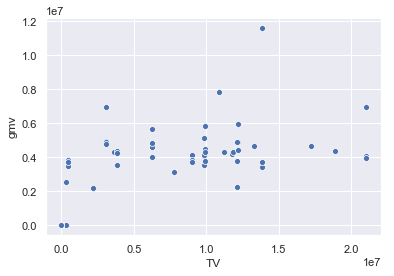

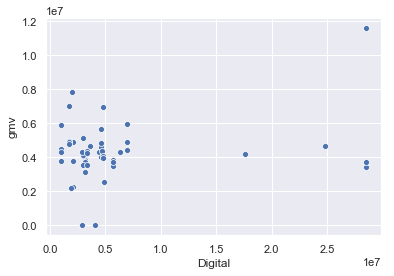

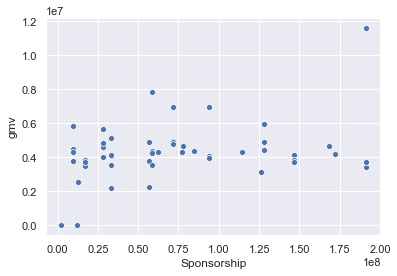

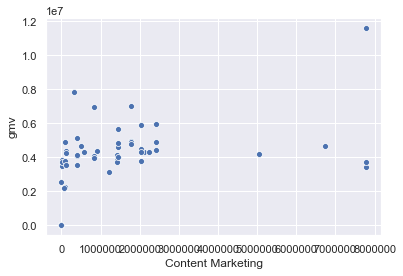

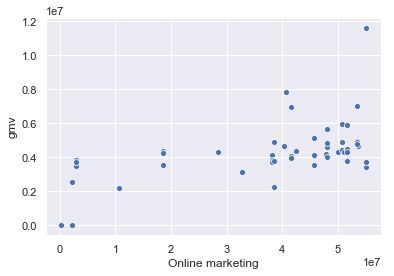

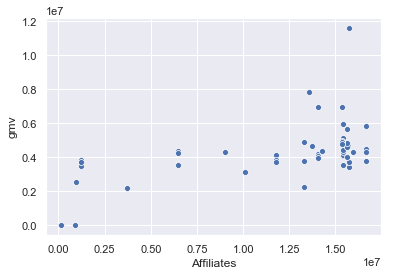

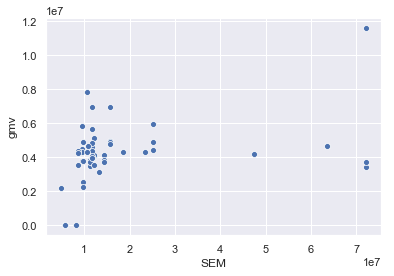

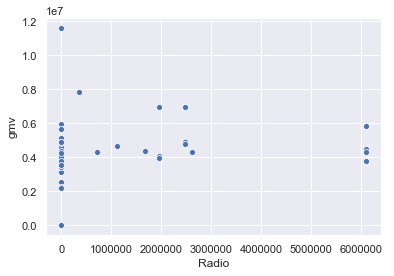

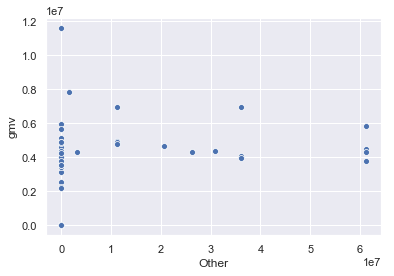

In [11]:
# Plotting scatter plots for adspends vs GMV
cols = ['TV', 'Digital', 'Sponsorship','Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio','Other']

for col in cols:
    sns.scatterplot(x=col, y="gmv", data=df_ca)
    plt.show()

In [12]:
#Creating dataframe with the numeric variables
df_ca_corr = df_ca[numeric_variables]

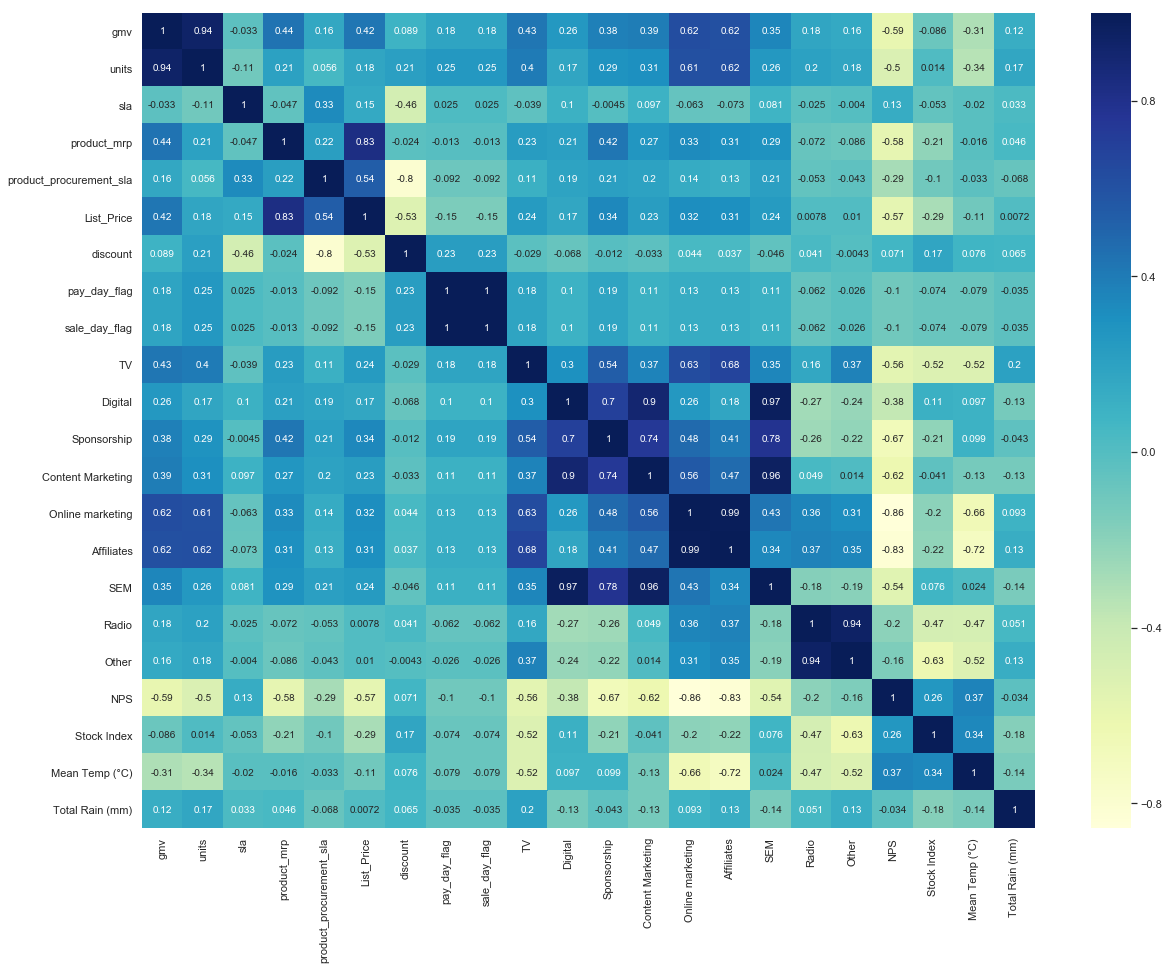

In [13]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,15)) 
sns.heatmap(df_ca_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [14]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. product procurement sla has high corelation with discount. We would drop product procurement sla.
# 3. pay_day_flag and sale_day_flag have high corelation. We would drop pay_day_flag.
# 4. Digital, Content Marketing and SEM have high corelation. We would drop Content Marketing and SEM.
# 5. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 6. Radio and Other have high corealtion. We would drop Other.
# 7. NPS have high negative colinearity with Online marketing. So, we would drop NPS.


df_ca_corr.drop(['product_procurement_sla', 'pay_day_flag', 'product_mrp', 'Content Marketing',  'SEM', 'Affiliates', 'Other', 'NPS', 'units'], axis = 1, inplace = True)
df_ca.drop(['product_procurement_sla', 'pay_day_flag', 'product_mrp' , 'Content Marketing',  'SEM', 'Affiliates', 'Other', 'NPS', 'units'], axis = 1, inplace = True)

In [15]:
# Copying the dataframe to be used for multiplicative model
df_ca_mult = df_ca.copy()

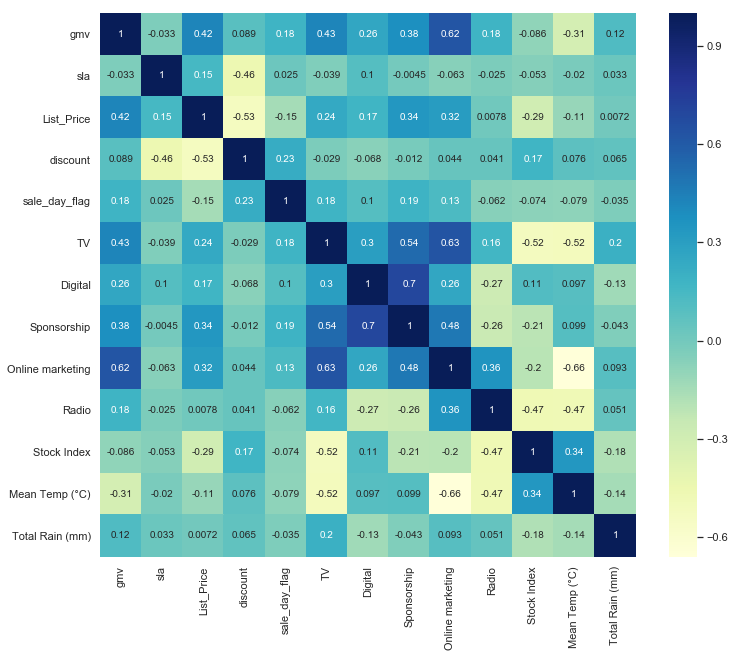

In [16]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(12,10)) 
sns.heatmap(df_ca_corr.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [17]:
### Dropping week_number feature
df_ca.drop(['week_number'], axis = 1, inplace = True)

In [18]:
df_ca.columns

Index(['gmv', 'sla', 'List_Price', 'discount', 'sale_day_flag', 'prepaid_frac',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio',
       'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)'],
      dtype='object')

In [19]:
# Scaling the numeric columns and removing flag variable
numeric_variables_ca = [ 'gmv', 'sla', 'List_Price', 'discount', 'prepaid_frac',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio',
       'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)']

In [20]:
# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
df_ca[numeric_variables_ca] = scaler.fit_transform(df_ca[numeric_variables_ca])

In [21]:
# Splitting the data in test and train
y = df_ca.pop('gmv')
X = df_ca

X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

In [22]:
y_train_ca.shape

(49,)

### Building first linear model using RFE

In [23]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ca, y_train_ca)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[False  True  True  True False  True False False  True False False False
 False]
[7 1 1 1 8 1 5 9 1 3 2 6 4]


In [24]:
list(zip(X_train_ca.columns,rfe.support_,rfe.ranking_))

[('sla', False, 7),
 ('List_Price', True, 1),
 ('discount', True, 1),
 ('sale_day_flag', True, 1),
 ('prepaid_frac', False, 8),
 ('TV', True, 1),
 ('Digital', False, 5),
 ('Sponsorship', False, 9),
 ('Online marketing', True, 1),
 ('Radio', False, 3),
 ('Stock Index', False, 2),
 ('Mean Temp (°C)', False, 6),
 ('Total Rain (mm)', False, 4)]

In [25]:
# Subset the features selected by rfe1
col = X_train_ca.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_rfe = X_train_ca[col]

# Add a constant to the model
X_rfe = sm.add_constant(X_rfe)

In [26]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ca, X_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     9.455
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.90e-06
Time:                        14:29:19   Log-Likelihood:                -51.653
No. Observations:                  49   AIC:                             115.3
Df Residuals:                      43   BIC:                             126.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1359      0.141  

In [27]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Online marketing,1.96000
4,TV,1.85000
0,const,1.77000
1,List_Price,1.69000
2,discount,1.55000
3,sale_day_flag,1.09000


In [28]:
# Dropping TV as it has high p-value
col = col.drop('TV', 1)

In [29]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ca[col])

lm = sm.OLS(y_train_ca, X_lm2).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     12.02
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.09e-06
Time:                        14:29:19   Log-Likelihood:                -51.727
No. Observations:                  49   AIC:                             113.5
Df Residuals:                      44   BIC:                             122.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1384      0.139  

In [30]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.77000
1,List_Price,1.67000
2,discount,1.55000
4,Online marketing,1.21000
3,sale_day_flag,1.09000


In [31]:
# Dropping sale_day_flag as it has high p-value
col = col.drop('sale_day_flag', 1)

In [32]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ca[col])

lm = sm.OLS(y_train_ca, X_lm3).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     15.07
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           6.28e-07
Time:                        14:29:20   Log-Likelihood:                -52.781
No. Observations:                  49   AIC:                             113.6
Df Residuals:                      45   BIC:                             121.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0108      0.106  

In [33]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,List_Price,1.67000
2,discount,1.50000
3,Online marketing,1.19000
0,const,1.00000


#### This is linear model. This is having R-Square of .501 and Adj. R-Square .468. Lets work on other models to see if non linear models have better performance than this one.

In [34]:
# Predictions

X_test_new = X_test_ca[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ca))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ca)**2)

print(RMSE)
print(MSE)

0.5653326893735695
0.3196010496743528


### Multiplicative Model

In [35]:
# Analysing the dataframe
#df_ca_mult = pd.read_csv('df_ca_weekly.csv', na_values=['', ' '])
df_ca_mult.describe()

,week_number,gmv,sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Digital,Sponsorship,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000
mean,53.36538,4185894.55557,6.15314,1007.29252,49.26011,0.42308,0.32130,8532034.99037,5648390.42068,70216857.98670,37232774.87224,898076.92308,1158.62088,12.02599,2.55061
std,15.36105,1887275.07390,0.82435,207.90265,7.32440,0.49887,0.23174,5773816.56062,6881338.29843,55556562.27531,18207230.35372,1740809.39773,78.13649,8.98093,3.23694
min,27.00000,299.00000,2.50000,299.00000,25.89655,0.00000,0.00000,14537.58453,1029677.41935,2401071.71178,291841.88649,0.00000,1015.00000,-7.26667,0.00000
25%,40.75000,3732459.94042,5.85705,870.98765,45.26472,0.00000,0.20950,3514686.42635,2657135.04423,28303064.53455,31737144.83639,0.00000,1092.21429,5.58167,0.24750
50%,53.50000,4249280.67317,6.21102,1049.15970,48.52909,0.00000,0.23199,9848136.05973,3315107.84865,58446595.13816,44094605.01444,0.00000,1194.00000,12.16000,1.05000
75%,66.25000,4783937.47445,6.39932,1172.82951,53.10193,1.00000,0.30168,12145457.92877,4783969.02503,99053792.88750,50910797.50203,1262903.22581,1222.00000,20.32500,3.84000
max,79.00000,11622828.56298,9.49372,1319.98500,84.97487,1.00000,1.00000,21000000.00000,28502373.66620,191196038.93030,55033046.50298,6096774.19355,1242.00000,24.56667,12.80000


In [36]:
# Dropping week_number
df_ca_mult = df_ca_mult.drop(['week_number'], axis = 1)

In [37]:
df_ca_mult.columns

Index(['gmv', 'sla', 'List_Price', 'discount', 'sale_day_flag', 'prepaid_frac',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio',
       'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)'],
      dtype='object')

In [38]:
# Scaling for all columns except the flag column
numeric_variables_ca_mult = ['gmv', 'sla', 'List_Price', 'discount', 'prepaid_frac',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio',
       'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)']

In [39]:
# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
df_ca_mult[numeric_variables_ca_mult] = scaler.fit_transform(df_ca_mult[numeric_variables_ca_mult])

In [40]:
df_ca_mult.shape

(52, 14)

In [41]:
# Taking natural log

for col in list(df_ca_mult.columns):
    df_ca_mult[col] = np.log(df_ca_mult[col])

In [42]:
df_ca_mult.describe()

,gmv,sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Digital,Sponsorship,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-1.13597,-0.73399,-0.57947,-1.11532,-inf,-1.56302,-1.79358,-2.85672,-1.98634,-0.55617,-inf,-1.10193,-0.90748,-3.97845
50%,-1.00630,-0.63373,-0.30824,-0.95948,-inf,-1.46108,-0.75802,-2.48664,-1.21450,-0.22355,-inf,-0.23756,-0.49394,-2.50179
75%,-0.88776,-0.58421,-0.15565,-0.77545,0.00000,-1.19838,-0.54807,-1.99048,-0.67352,-0.07830,-1.59076,-0.09223,-0.14301,-1.20538
max,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000


In [43]:
# Handling the negative infinite value as NaN and filling all NaN as 0
df_ca_mult.replace([-np.inf, np.inf], np.nan,inplace=True)
df_ca_mult.fillna(0,inplace=True)

In [44]:
df_ca_mult.describe()

,gmv,sla,List_Price,discount,sale_day_flag,prepaid_frac,TV,Digital,Sponsorship,Online marketing,Radio,Stock Index,Mean Temp (°C),Total Rain (mm)
count,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000
mean,-1.39969,-0.63036,-0.38088,-0.91855,0.00000,-1.23778,-1.12641,-2.06603,-1.26152,-0.53908,-0.30404,-0.56512,-0.59821,-1.46475
std,1.84027,0.17897,0.32441,0.26018,0.00000,0.50809,1.09011,1.08685,0.99996,0.92189,0.62959,0.74518,0.56297,1.30219
min,-9.86158,-1.11933,-1.89482,-1.28776,0.00000,-1.68337,-4.14414,-3.65705,-3.28299,-3.38801,-2.84385,-2.28946,-2.19827,-4.44657
25%,-1.13099,-0.72323,-0.55808,-1.09195,0.00000,-1.56010,-1.69183,-2.65905,-1.85969,-0.36692,-0.00000,-0.87812,-0.87636,-2.55965
50%,-0.99796,-0.62455,-0.30236,-0.95555,0.00000,-1.45357,-0.75588,-2.14805,-1.07726,-0.18817,0.00000,-0.17870,-0.47590,-1.29562
75%,-0.87478,-0.57968,-0.14579,-0.77345,0.00000,-1.18566,-0.54458,-1.73603,-0.40721,-0.06263,0.00000,-0.06366,-0.13353,-0.00588
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


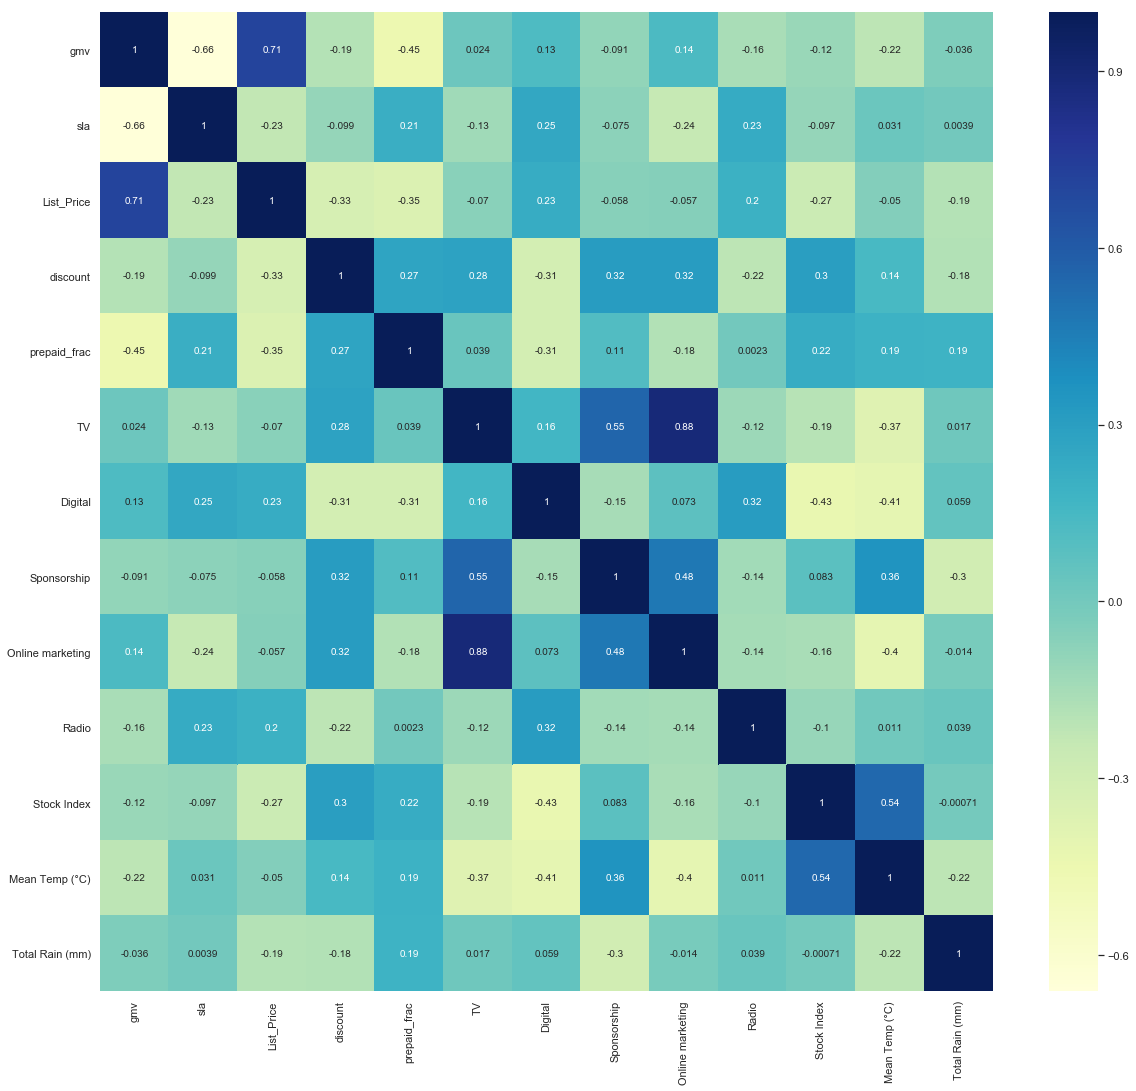

In [45]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ca_mult[numeric_variables_ca_mult].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [46]:
### Dropping corelated column and flag columns
df_ca_mult.drop(['TV', 'sale_day_flag', 'List_Price'], axis = 1, inplace = True)

In [47]:
# Split the dataset into  test and train
y = df_ca_mult.pop('gmv')
X = df_ca_mult

X_train_ca_mult, X_test_ca_mult, y_train_ca_mult, y_test_ca_mult = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

In [48]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ca_mult, y_train_ca_mult)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True  True  True False False  True False False False]
[1 1 1 1 6 3 1 5 2 4]


In [49]:
list(zip(X_train_ca_mult.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('discount', True, 1),
 ('prepaid_frac', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', False, 6),
 ('Online marketing', False, 3),
 ('Radio', True, 1),
 ('Stock Index', False, 5),
 ('Mean Temp (°C)', False, 2),
 ('Total Rain (mm)', False, 4)]

In [50]:
# Subset the features selected by rfe
col = X_train_ca_mult.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_rfe = X_train_ca_mult[col]

# Add a constant to the model
X_rfe = sm.add_constant(X_rfe)

In [51]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ca_mult, X_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     13.01
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           9.96e-08
Time:                        14:29:23   Log-Likelihood:                -77.658
No. Observations:                  49   AIC:                             167.3
Df Residuals:                      43   BIC:                             178.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.9655      1.077     -6.466   

In [52]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.81000
4,Digital,1.37000
3,prepaid_frac,1.36000
1,sla,1.19000
2,discount,1.19000
5,Radio,1.17000


In [53]:
# Dropping Radio as it has high p-value
col = col.drop('Radio', 1)

In [54]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ca_mult[col])

lm2 = sm.OLS(y_train_ca_mult, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     15.86
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           4.13e-08
Time:                        14:29:27   Log-Likelihood:                -78.355
No. Observations:                  49   AIC:                             166.7
Df Residuals:                      44   BIC:                             176.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.0042      1.080     -6.487   

In [55]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.77000
3,prepaid_frac,1.32000
4,Digital,1.28000
1,sla,1.19000
2,discount,1.16000


In [56]:
# Dropping discount as it has high p-value
col = col.drop('discount', 1)

In [57]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ca_mult[col])

lm3 = sm.OLS(y_train_ca_mult, X_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     20.13
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.02e-08
Time:                        14:29:27   Log-Likelihood:                -79.379
No. Observations:                  49   AIC:                             166.8
Df Residuals:                      45   BIC:                             174.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.0296      0.820     -7.352   

In [58]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.25000
2,prepaid_frac,1.25000
3,Digital,1.23000
1,sla,1.18000


In [59]:
# Predictions

X_test_new = X_test_ca_mult[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm3.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ca_mult))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ca_mult)**2)

print(RMSE)
print(MSE)

0.11224011730786722
0.012597843933283795


#### For Multiplicative model we are getting R-Square of .573 and Adj. R-Square .545. 

### Creating Distributed Lag Model

In [60]:
# We would read the file created for adstock for distributed lag model

df_ca_lagged = pd.read_csv('df_ca_weekly_adstock.csv', na_values=['', ' '])
df_ca_lagged.head()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,NPS,Stock Index,Mean Temp (°C),Total Rain (mm)
0,27,18040.00000,28.00000,2.50000,1422.53571,2.67857,644.28571,47.92634,0,0,...,1504.67345,2140770.31456,882667.51444,8102737.81471,0.00000,0.00000,54.00000,1177.00000,19.36000,0.00000
1,28,3477101.65688,2980.33123,7.03169,2262.48968,2.69158,1181.32677,43.00575,0,0,...,2858.87955,4067463.59766,1677068.27744,15395201.84794,0.00000,0.00000,54.00000,1177.00000,20.10000,4.41667
2,29,3852264.62237,3177.89181,6.41227,2322.91325,2.72632,1224.10207,43.99524,1,1,...,3535.98260,5030810.23921,2074268.65894,19041433.86456,0.00000,0.00000,54.00000,1177.00000,23.18333,1.40000
3,30,3741256.92908,3147.11152,6.43136,2270.85382,2.76202,1197.04128,42.92598,0,0,...,3874.53412,5512483.55998,2272868.84969,20864549.87287,0.00000,0.00000,54.00000,1177.00000,23.06000,0.90000
4,31,2550908.29393,2085.65431,6.38965,2224.95887,2.73268,1234.62521,42.19548,0,0,...,3446.02124,4980395.49069,2066639.99110,20156643.72176,0.00000,0.00000,55.42857,1185.28571,24.56667,4.63333


In [61]:
# Lets take lag for 2 weeks for some variables
cols = ['gmv', 'product_mrp', 'sla']

for col in cols:
    df_ca_lagged[col + '_lag_1'] = df_ca_lagged[col].shift(1)
    df_ca_lagged[col + '_lag_2'] = df_ca_lagged[col].shift(2)

In [62]:
# Creating moving average for few columns 

cols = ['List_Price', 'discount']
for col in cols:
    df_ca_lagged[col + '_ma_2'] = df_ca_lagged[col].rolling(window=2).mean()
    df_ca_lagged[col + '_ma_3'] = df_ca_lagged[col].rolling(window=3).mean()

In [63]:
df_ca_lagged.head()

,week_number,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,27,18040.00000,28.00000,2.50000,1422.53571,2.67857,644.28571,47.92634,0,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28,3477101.65688,2980.33123,7.03169,2262.48968,2.69158,1181.32677,43.00575,0,0,...,18040.00000,nan,1422.53571,nan,2.50000,nan,912.80624,nan,45.46604,nan
2,29,3852264.62237,3177.89181,6.41227,2322.91325,2.72632,1224.10207,43.99524,1,1,...,3477101.65688,18040.00000,2262.48968,1422.53571,7.03169,2.50000,1202.71442,1016.57152,43.50049,44.97577
3,30,3741256.92908,3147.11152,6.43136,2270.85382,2.76202,1197.04128,42.92598,0,0,...,3852264.62237,3477101.65688,2322.91325,2262.48968,6.41227,7.03169,1210.57167,1200.82337,43.46061,43.30899
4,31,2550908.29393,2085.65431,6.38965,2224.95887,2.73268,1234.62521,42.19548,0,0,...,3741256.92908,3852264.62237,2270.85382,2322.91325,6.43136,6.41227,1215.83325,1218.58952,42.56073,43.03890


In [64]:
### Dropping product subcategory and week_number
df_ca_lagged.drop(['week_number'], axis = 1, inplace = True)

In [65]:
# Replacing the NaN values
df_ca_lagged=df_ca_lagged.replace(np.nan, 0)

In [66]:
df_ca_lagged.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,18040.00000,28.00000,2.50000,1422.53571,2.67857,644.28571,47.92634,0,0,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,3477101.65688,2980.33123,7.03169,2262.48968,2.69158,1181.32677,43.00575,0,0,0.33402,...,18040.00000,0.00000,1422.53571,0.00000,2.50000,0.00000,912.80624,0.00000,45.46604,0.00000
2,3852264.62237,3177.89181,6.41227,2322.91325,2.72632,1224.10207,43.99524,1,1,0.34254,...,3477101.65688,18040.00000,2262.48968,1422.53571,7.03169,2.50000,1202.71442,1016.57152,43.50049,44.97577
3,3741256.92908,3147.11152,6.43136,2270.85382,2.76202,1197.04128,42.92598,0,0,0.32706,...,3852264.62237,3477101.65688,2322.91325,2262.48968,6.41227,7.03169,1210.57167,1200.82337,43.46061,43.30899
4,2550908.29393,2085.65431,6.38965,2224.95887,2.73268,1234.62521,42.19548,0,0,0.30167,...,3741256.92908,3852264.62237,2270.85382,2322.91325,6.43136,6.41227,1215.83325,1218.58952,42.56073,43.03890


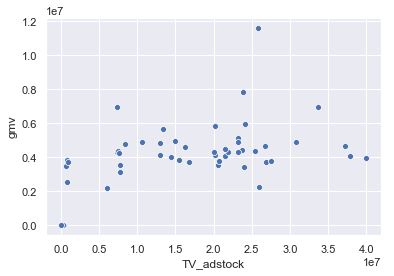

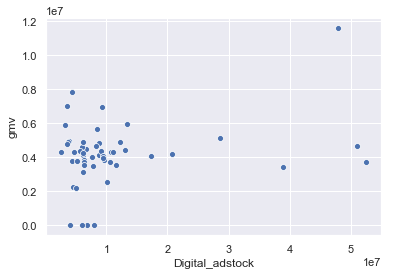

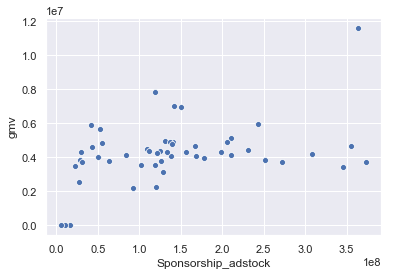

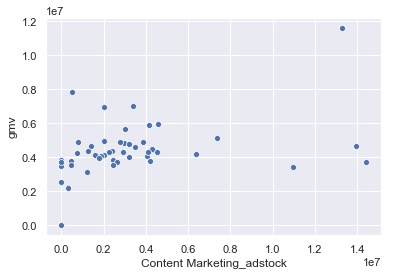

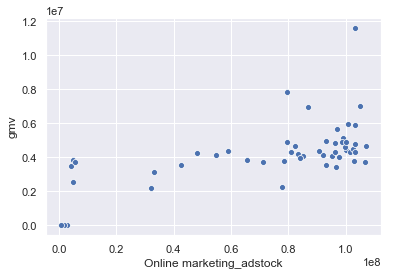

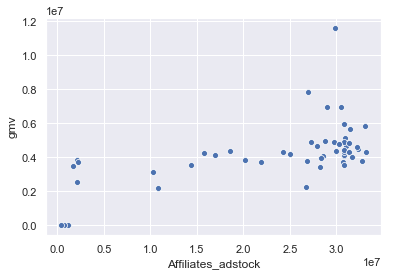

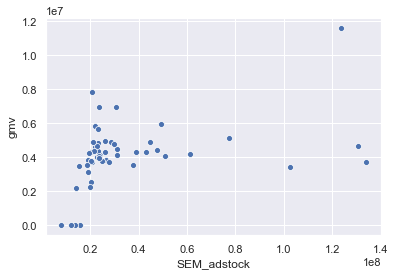

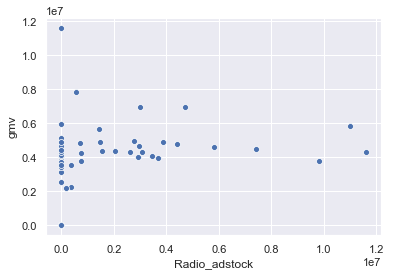

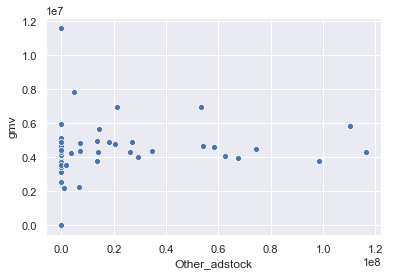

In [67]:
# Plotting the adstock vs gmv
cols = ['TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock',
       'Online marketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock']

for col in cols:
    sns.scatterplot(x=col, y="gmv", data=df_ca_lagged)
    plt.show()

In [68]:
df_ca_lagged.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [69]:
# Scaling the numeric columns except flag columns
numeric_variables_ca = ['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3']

In [70]:
# Create a scaling object
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
df_ca_lagged[numeric_variables_ca] = scaler.fit_transform(df_ca_lagged[numeric_variables_ca])

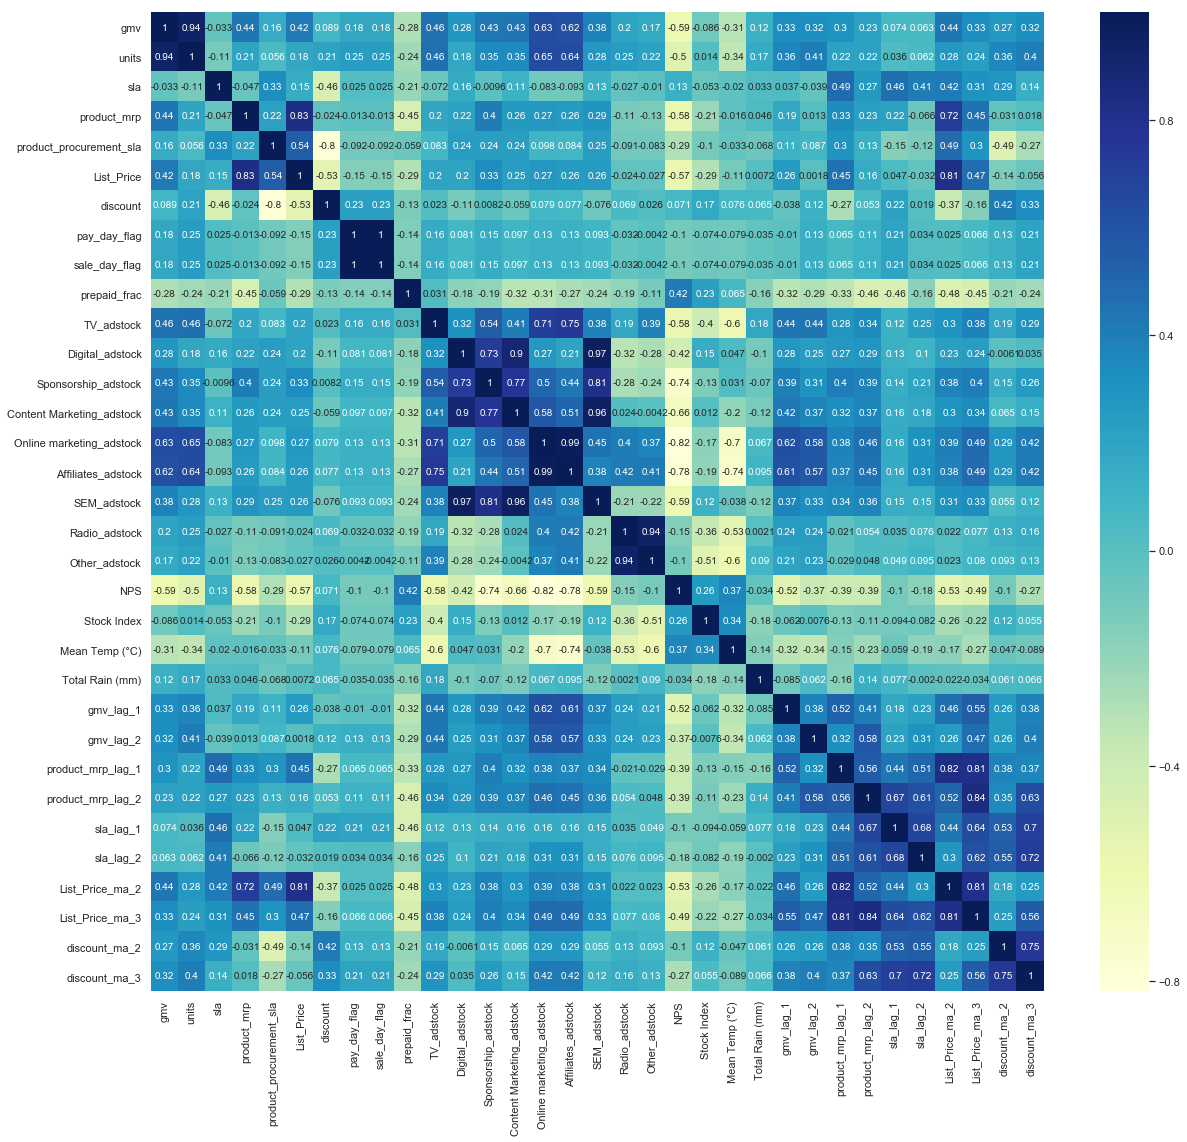

In [71]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ca_lagged.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [72]:
# Copying the dataframe to be used for koyck model
df_ca_koyck = df_ca_lagged.copy()

In [73]:
# Copying the dataframe to be used for multiplicative model
df_ca_dist_mult = df_ca_lagged.copy()

In [74]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. product procurement sla has high corelation with discount. We would drop product procurement sla.
# 3. pay_day_flag and sale_day_flag have high corelation. We would drop pay_day_flag.
# 4. Digital, Content Marketing and SEM have high corelation. We would drop Content Marketing and SEM.
# 5. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 6. Radio and Other have high corealtion. We would drop Other.
# 7. NPS have high negative colinearity with Online marketing. So, we would drop NPS.


df_ca_lagged.drop(['product_procurement_sla', 'pay_day_flag', 'product_mrp', 'units','Content Marketing_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'discount_ma_2', 'discount_ma_3', 'List_Price', 'product_mrp_lag_1', 'List_Price_ma_2', 'product_mrp_lag_2', 'Mean Temp (°C)', 'NPS', 'TV_adstock', 'Sponsorship_adstock'], axis = 1, inplace = True)

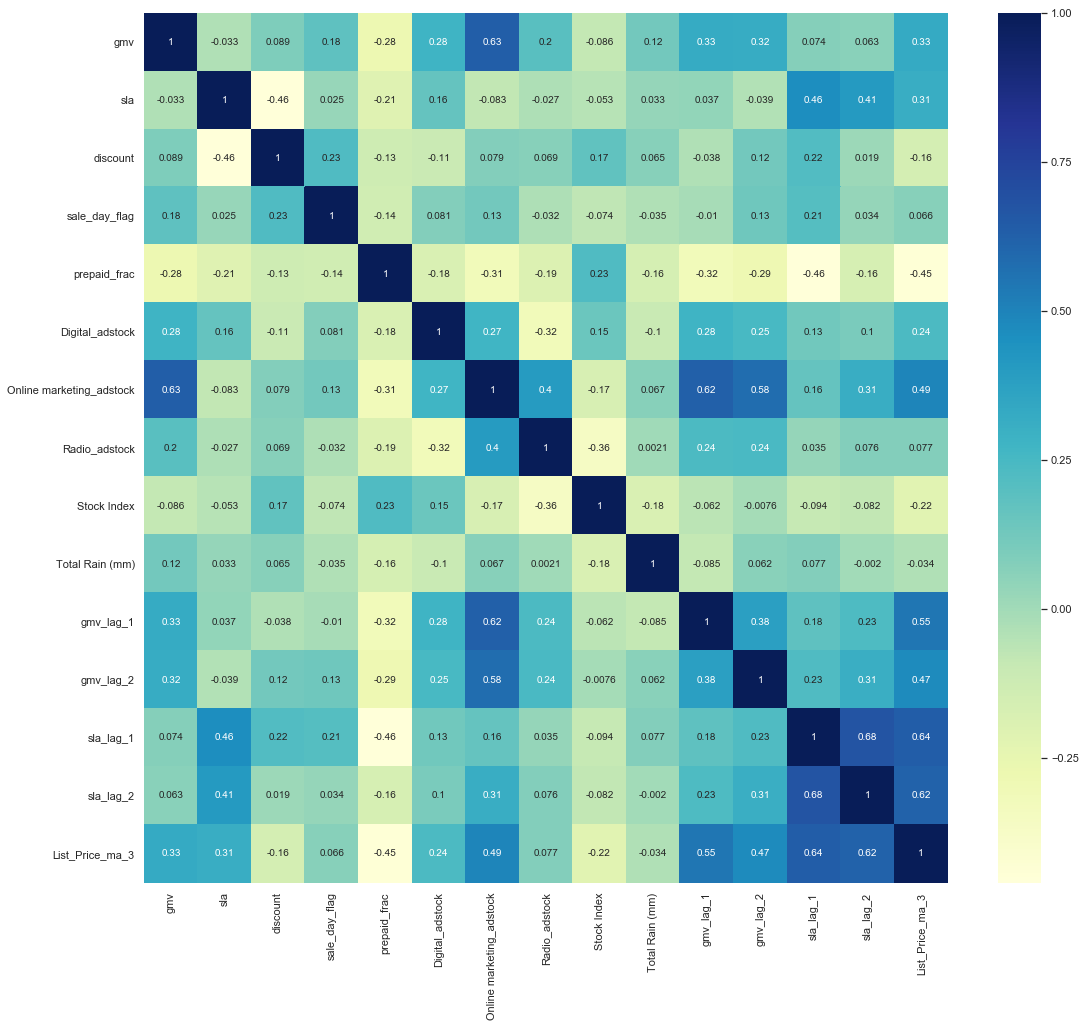

In [75]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ca_lagged.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [76]:
# Split the dataset into  test and train
y = df_ca_lagged.pop('gmv')
X = df_ca_lagged

X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=100)

### Building first model using RFE

In [77]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ca, y_train_ca)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True False False False False False False False  True False False
  True  True]
[ 1  1 10  6  4  2  7  9  8  1  3  5  1  1]


In [78]:
list(zip(X_train_ca.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('discount', True, 1),
 ('sale_day_flag', False, 10),
 ('prepaid_frac', False, 6),
 ('Digital_adstock', False, 4),
 ('Online marketing_adstock', False, 2),
 ('Radio_adstock', False, 7),
 ('Stock Index', False, 9),
 ('Total Rain (mm)', False, 8),
 ('gmv_lag_1', True, 1),
 ('gmv_lag_2', False, 3),
 ('sla_lag_1', False, 5),
 ('sla_lag_2', True, 1),
 ('List_Price_ma_3', True, 1)]

In [79]:
## Check the summary of this model using `statsmodels`.
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col = X_train_ca.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ca[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ca, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     7.601
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.45e-05
Time:                        14:29:35   Log-Likelihood:                 36.941
No. Observations:                  49   AIC:                            -61.88
Df Residuals:                      43   BIC:                            -50.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5307      0.179     

In [81]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,106.29000
5,List_Price_ma_3,2.45000
1,sla,2.19000
4,sla_lag_2,2.12000
2,discount,2.07000
3,gmv_lag_1,1.69000


In [82]:
# Dropping gmv_lag_1 as it has high p-value
col = col.drop('gmv_lag_1', 1)

In [83]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ca[col])

lm2 = sm.OLS(y_train_ca, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     8.984
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.15e-05
Time:                        14:29:35   Log-Likelihood:                 36.053
No. Observations:                  49   AIC:                            -62.11
Df Residuals:                      44   BIC:                            -52.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4771      0.175     

In [84]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,100.28000
1,sla,2.14000
3,sla_lag_2,2.03000
2,discount,1.79000
4,List_Price_ma_3,1.69000


In [85]:
# Predictions

X_test_new = X_test_ca[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm2.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ca))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ca)**2)

print(RMSE)
print(MSE)

0.6165675707399686
0.3801555692881862


#### Distributed lag model has R-Square = .450 and Adjusted R-Square= .400, RMSE= .616 and MSE = .380.

### Koyck Model

In [86]:
# Reading the dataset created above
df_ca_koyck.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,0.00153,0.00262,0.00000,0.38078,0.55952,0.33819,0.37289,0,0,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.29914,0.28913,0.64796,0.85249,0.56386,0.86419,0.28960,0,0,0.33402,...,0.00155,0.00000,0.56334,0.00000,0.26333,0.00000,0.69607,0.00000,0.68629,0.00000
2,0.33142,0.30830,0.55940,0.88642,0.57544,0.90609,0.30635,1,1,0.34254,...,0.29916,0.00155,0.89598,0.56334,0.74067,0.26333,0.91714,0.80157,0.65662,0.76620
3,0.32187,0.30531,0.56213,0.85718,0.58734,0.87958,0.28825,0,0,0.32706,...,0.33144,0.29916,0.91991,0.89598,0.67542,0.74067,0.92313,0.94685,0.65602,0.73780
4,0.21945,0.20231,0.55616,0.83141,0.57756,0.91639,0.27589,0,0,0.30167,...,0.32189,0.33144,0.89929,0.91991,0.67743,0.67542,0.92715,0.96086,0.64244,0.73320


In [87]:
df_ca_koyck.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [88]:
# Let's drop all the lag and moving averages except gmv_lag1 columns which are not used in koyck models

df_ca_koyck.drop(['gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'], axis = 1, inplace = True)

In [89]:
df_ca_koyck.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1'],
      dtype='object')

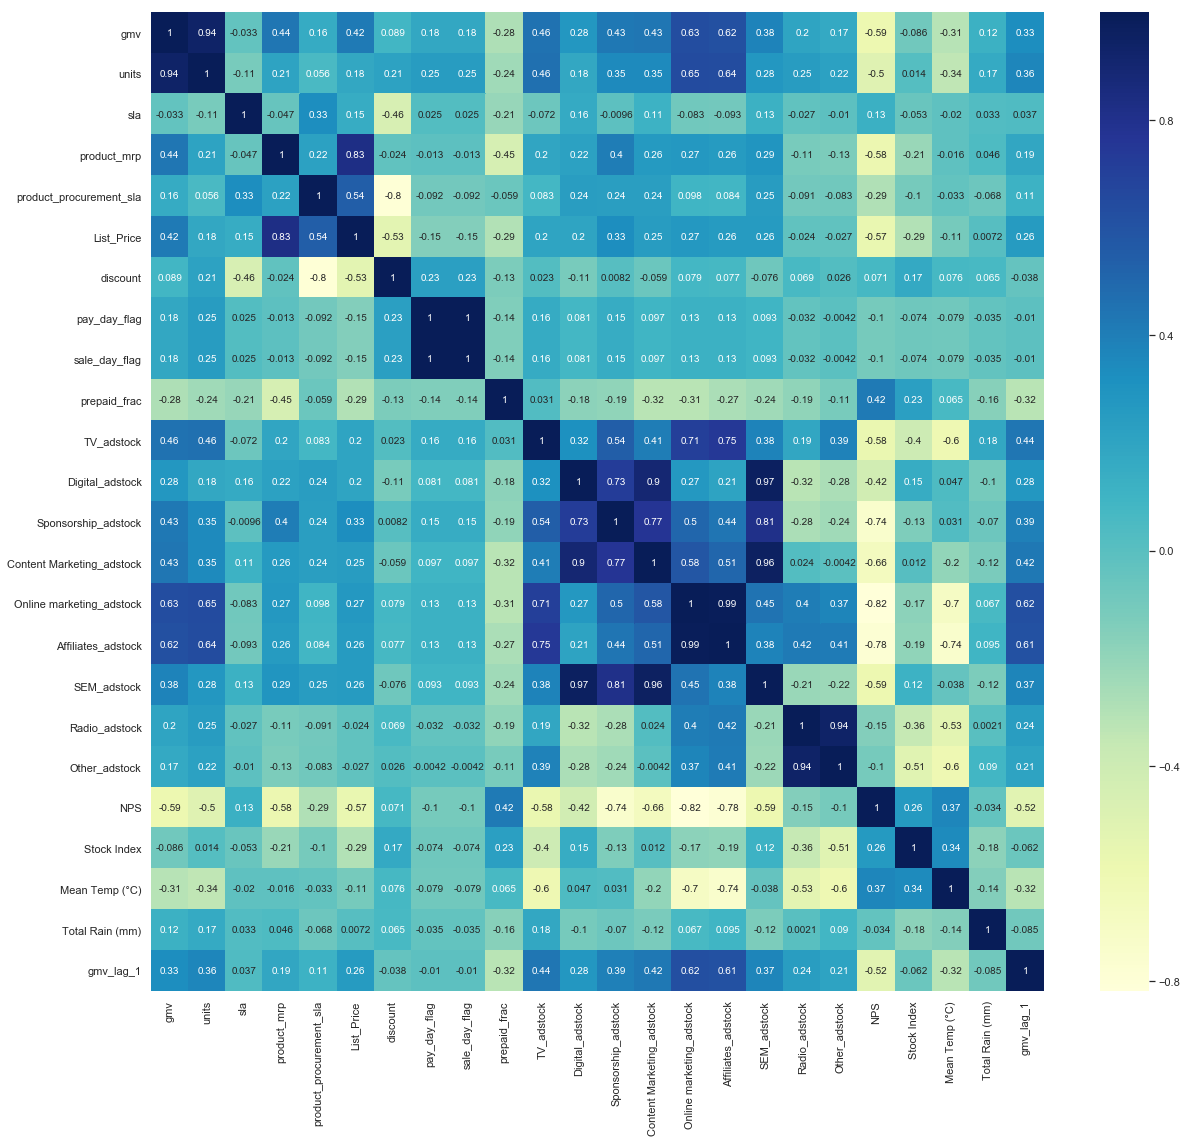

In [90]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ca_koyck.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [91]:
# Identifying highly co-related variables:
# 1. product mrp has high corelation with list_price. We would drop product_mrp.
# 2. product procurement sla has high corelation with discount. We would drop product procurement sla.
# 3. pay_day_flag and sale_day_flag have high corelation. We would drop pay_day_flag.
# 4. Digital, Content Marketing and SEM have high corelation. We would drop Content Marketing and SEM.
# 5. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 6. Radio and Other have high corealtion. We would drop Other.
# 7. NPS have high negative colinearity with Online marketing. So, we would drop NPS.


df_ca_koyck.drop(['product_procurement_sla', 'pay_day_flag', 'product_mrp', 'units','Content Marketing_adstock',  'SEM_adstock', 'Affiliates_adstock', 'Other_adstock', 'Mean Temp (°C)'], axis = 1, inplace = True)

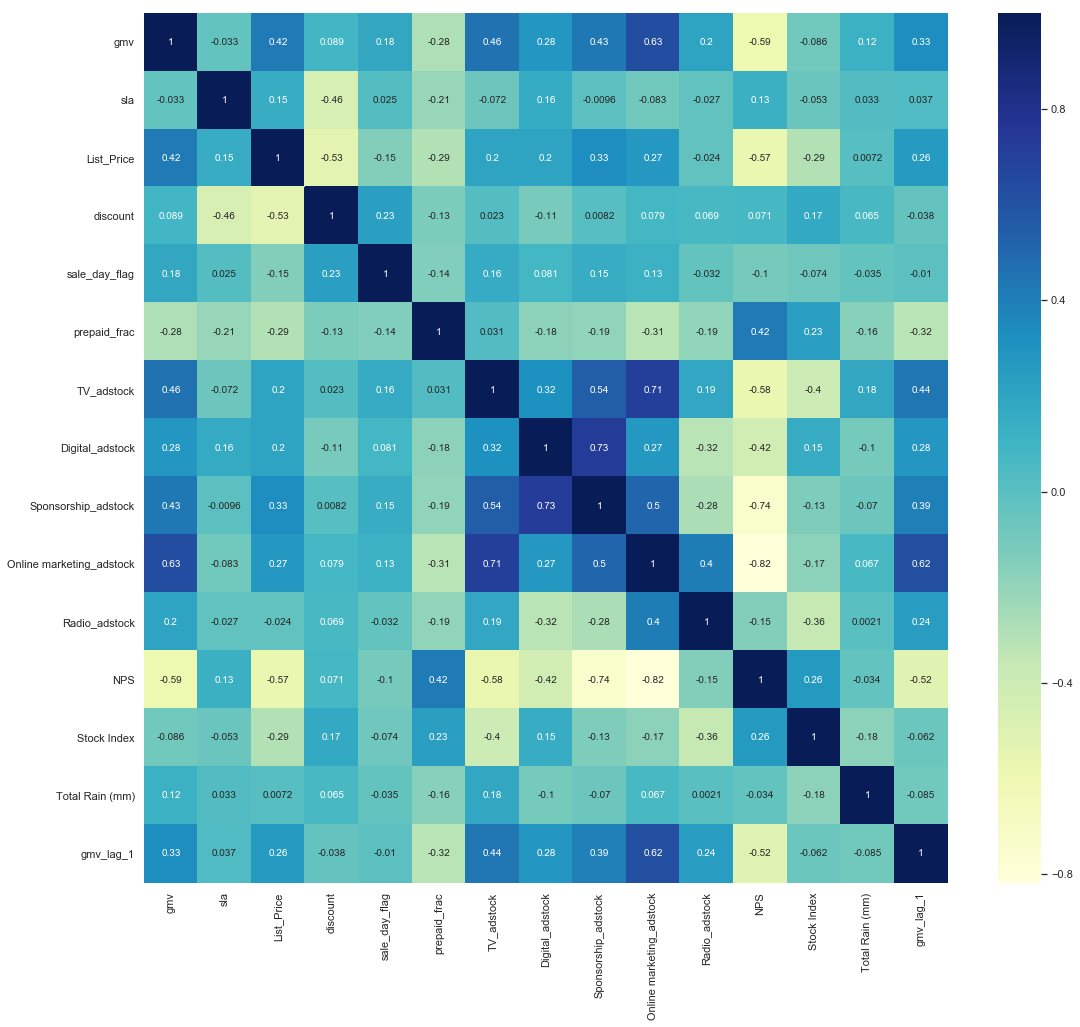

In [92]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ca_koyck.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [93]:
# Split the dataset into  test and train
y = df_ca_koyck.pop('gmv')
X = df_ca_koyck

X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

### Building first model using RFE

In [94]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ca, y_train_ca)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[False  True  True False False False False False  True False  True False
 False  True]
[ 7  1  1  6 10  8  9  2  1  3  1  4  5  1]


In [95]:
list(zip(X_train_ca.columns,rfe.support_,rfe.ranking_))

[('sla', False, 7),
 ('List_Price', True, 1),
 ('discount', True, 1),
 ('sale_day_flag', False, 6),
 ('prepaid_frac', False, 10),
 ('TV_adstock', False, 8),
 ('Digital_adstock', False, 9),
 ('Sponsorship_adstock', False, 2),
 ('Online marketing_adstock', True, 1),
 ('Radio_adstock', False, 3),
 ('NPS', True, 1),
 ('Stock Index', False, 4),
 ('Total Rain (mm)', False, 5),
 ('gmv_lag_1', True, 1)]

In [96]:
## Check the summary of this model using `statsmodels`.
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col = X_train_ca.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ca[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [97]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ca, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     10.15
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.81e-06
Time:                        14:29:41   Log-Likelihood:                 38.822
No. Observations:                  49   AIC:                            -65.64
Df Residuals:                      43   BIC:                            -54.29
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [98]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,151.63000
4,NPS,5.25000
3,Online marketing_adstock,4.52000
1,List_Price,2.66000
5,gmv_lag_1,1.69000
2,discount,1.58000


In [99]:
# Dropping NPS as it has high p-value
col = col.drop('NPS', 1)

In [100]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ca[col])

lm2 = sm.OLS(y_train_ca, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     12.51
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.06e-07
Time:                        14:29:41   Log-Likelihood:                 38.330
No. Observations:                  49   AIC:                            -66.66
Df Residuals:                      44   BIC:                            -57.20
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [101]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.84000
3,Online marketing_adstock,1.80000
4,gmv_lag_1,1.68000
1,List_Price,1.63000
2,discount,1.52000


In [102]:
# Dropping NPS as it has high p-value
col = col.drop('gmv_lag_1', 1)

In [103]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ca[col])

lm3 = sm.OLS(y_train_ca, X_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     16.23
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.73e-07
Time:                        14:29:41   Log-Likelihood:                 37.693
No. Observations:                  49   AIC:                            -67.39
Df Residuals:                      45   BIC:                            -59.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [104]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.77000
1,List_Price,1.63000
2,discount,1.51000
3,Online marketing_adstock,1.16000


In [105]:
# Predictions

X_test_new = X_test_ca[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm3.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ca))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ca)**2)

print(RMSE)
print(MSE)


0.09063578785363643
0.00821484603984939


#### Koyck Model is giving us R-square of .520 and adjusted R-square of .488.

### Distributive Lagged Multiplicative Model

In [106]:
# Reading the dataset created above
df_ca_dist_mult.head()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
0,0.00153,0.00262,0.00000,0.38078,0.55952,0.33819,0.37289,0,0,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.29914,0.28913,0.64796,0.85249,0.56386,0.86419,0.28960,0,0,0.33402,...,0.00155,0.00000,0.56334,0.00000,0.26333,0.00000,0.69607,0.00000,0.68629,0.00000
2,0.33142,0.30830,0.55940,0.88642,0.57544,0.90609,0.30635,1,1,0.34254,...,0.29916,0.00155,0.89598,0.56334,0.74067,0.26333,0.91714,0.80157,0.65662,0.76620
3,0.32187,0.30531,0.56213,0.85718,0.58734,0.87958,0.28825,0,0,0.32706,...,0.33144,0.29916,0.91991,0.89598,0.67542,0.74067,0.92313,0.94685,0.65602,0.73780
4,0.21945,0.20231,0.55616,0.83141,0.57756,0.91639,0.27589,0,0,0.30167,...,0.32189,0.33144,0.89929,0.91991,0.67743,0.67542,0.92715,0.96086,0.64244,0.73320


In [107]:
df_ca_dist_mult.columns

Index(['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla',
       'List_Price', 'discount', 'pay_day_flag', 'sale_day_flag',
       'prepaid_frac', 'TV_adstock', 'Digital_adstock', 'Sponsorship_adstock',
       'Content Marketing_adstock', 'Online marketing_adstock',
       'Affiliates_adstock', 'SEM_adstock', 'Radio_adstock', 'Other_adstock',
       'NPS', 'Stock Index', 'Mean Temp (°C)', 'Total Rain (mm)', 'gmv_lag_1',
       'gmv_lag_2', 'product_mrp_lag_1', 'product_mrp_lag_2', 'sla_lag_1',
       'sla_lag_2', 'List_Price_ma_2', 'List_Price_ma_3', 'discount_ma_2',
       'discount_ma_3'],
      dtype='object')

In [108]:
# Taking natural log

for col in list(df_ca_dist_mult.columns):
    df_ca_dist_mult[col] = np.log(df_ca_dist_mult[col])

In [109]:
df_ca_dist_mult.describe()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
count,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,...,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-1.13597,-1.17841,-0.73399,-0.48418,-0.73192,-0.57947,-1.11532,-inf,-inf,-1.56302,...,-1.13591,-1.13591,-0.32801,-0.33535,-0.48300,-0.49413,-0.37987,-0.33819,-0.36665,-0.24441
50%,-1.00630,-0.90928,-0.63373,-0.31896,-0.61434,-0.30824,-0.95948,-inf,-inf,-1.46108,...,-1.00625,-1.00625,-0.22381,-0.22381,-0.42431,-0.42431,-0.26002,-0.23613,-0.30846,-0.19039
75%,-0.88776,-0.68844,-0.58421,-0.15822,-0.55077,-0.15565,-0.77545,0.00000,0.00000,-1.19838,...,-0.88773,-0.88773,-0.10892,-0.10892,-0.39444,-0.39444,-0.13822,-0.14112,-0.23824,-0.11948
max,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000


In [110]:
# Handling the negative infinite value as NaN and filling all NaN as 0
df_ca_dist_mult.replace([-np.inf, np.inf], np.nan,inplace=True)
df_ca_dist_mult.fillna(0,inplace=True)

In [111]:
df_ca_dist_mult.describe()

,gmv,units,sla,product_mrp,product_procurement_sla,List_Price,discount,pay_day_flag,sale_day_flag,prepaid_frac,...,gmv_lag_1,gmv_lag_2,product_mrp_lag_1,product_mrp_lag_2,sla_lag_1,sla_lag_2,List_Price_ma_2,List_Price_ma_3,discount_ma_2,discount_ma_3
count,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,...,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000,52.00000
mean,-1.39969,-1.29509,-0.63036,-0.33743,-0.62900,-0.38088,-0.91855,0.00000,0.00000,-1.23778,...,-1.55839,-1.53552,-0.23726,-0.23273,-0.43354,-0.42467,-0.27545,-0.23269,-0.29533,-0.17079
std,1.84027,1.78408,0.17897,0.27423,0.23375,0.32441,0.26018,0.00000,0.00000,0.50809,...,2.19193,2.20204,0.20800,0.21058,0.16834,0.17868,0.21594,0.17603,0.10933,0.09092
min,-9.86158,-9.24034,-1.11933,-1.61403,-1.79176,-1.89482,-1.28776,0.00000,0.00000,-1.68337,...,-10.56804,-10.56804,-1.22135,-1.22135,-1.33434,-1.33434,-1.24991,-0.94757,-0.66571,-0.46136
25%,-1.13099,-1.17505,-0.72323,-0.45151,-0.71051,-0.55808,-1.09195,0.00000,0.00000,-1.56010,...,-1.13093,-1.12036,-0.31558,-0.31558,-0.47683,-0.47683,-0.37805,-0.32711,-0.36260,-0.22914
50%,-0.99796,-0.88740,-0.62455,-0.29362,-0.60729,-0.30236,-0.95555,0.00000,0.00000,-1.45357,...,-0.99792,-0.99535,-0.21391,-0.19768,-0.41882,-0.41704,-0.24614,-0.20908,-0.30393,-0.17592
75%,-0.87478,-0.66866,-0.57968,-0.14743,-0.54474,-0.14579,-0.77345,0.00000,0.00000,-1.18566,...,-0.87475,-0.86649,-0.10165,-0.08697,-0.39167,-0.38822,-0.11535,-0.12012,-0.22300,-0.10591
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [112]:
# Dropping flag variables after taking log
df_ca_dist_mult.drop(['pay_day_flag', 'sale_day_flag' ], axis = 1, inplace = True)

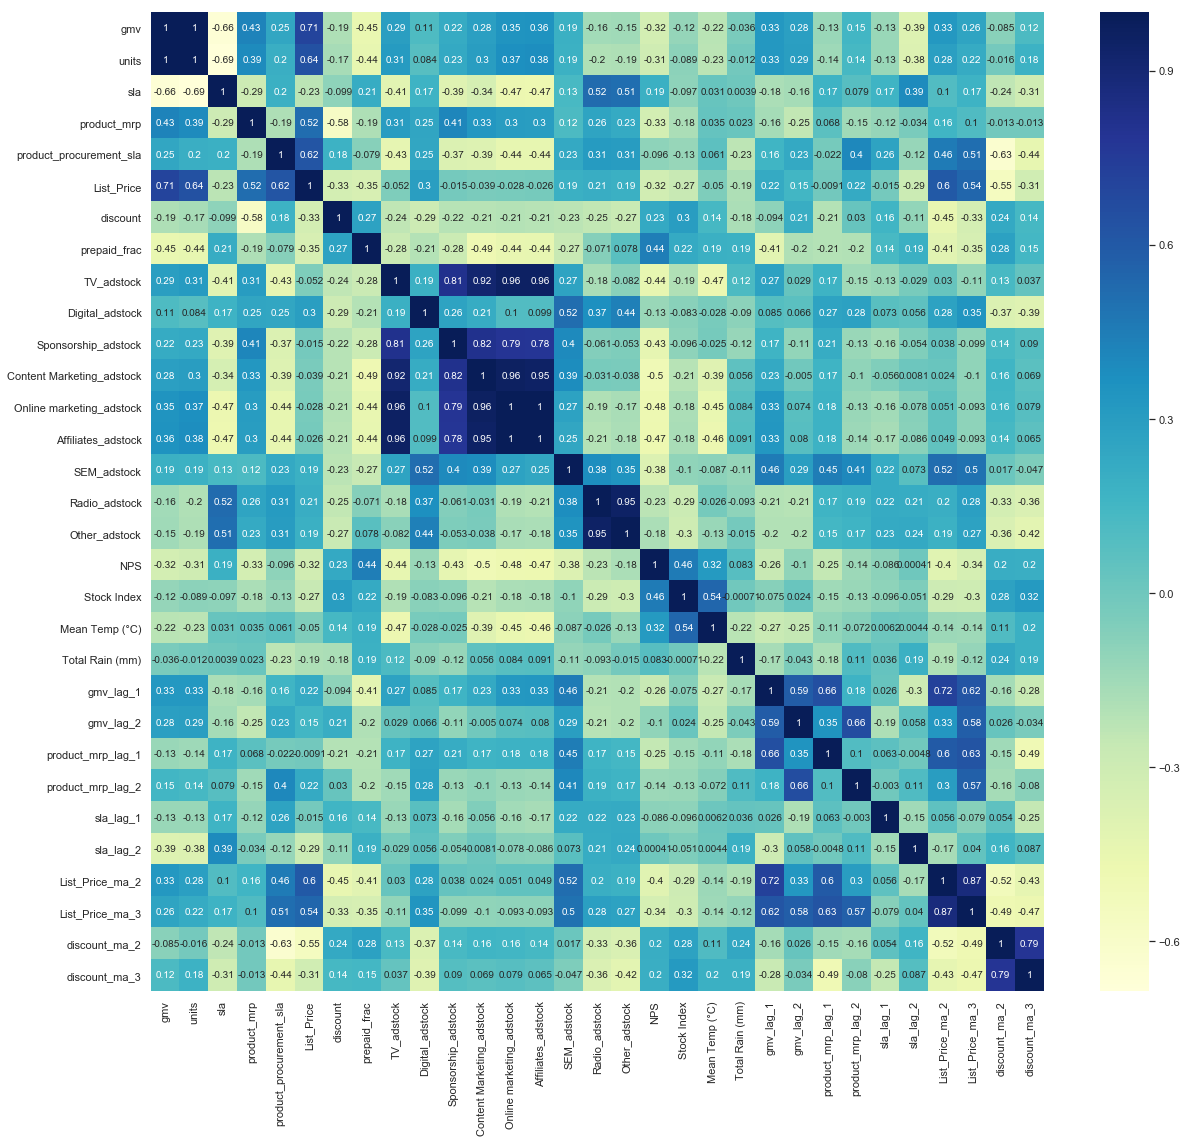

In [113]:
#Correlation Plot for weekly data
plt.figure(figsize=(20,18)) 
sns.heatmap(df_ca_dist_mult.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [114]:
# Identifying highly co-related variables:
# 1. TV Adstock, Online Marketing, Sponsorship, Content Marketing and Affiliate adstock have high corelation.
# 2. Online Marketing and Affiliates have high corelation. We would drop Affiliates.
# 3. Radio and Other have high corealtion. We would drop Other.
# 4. gmv and units has high correlation So we would drop units.
# 5. List price moving averages have high corelation.



df_ca_dist_mult.drop([ 'units', 'Affiliates_adstock', 'Other_adstock', 'TV_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock', 'List_Price_ma_3' ], axis = 1, inplace = True)

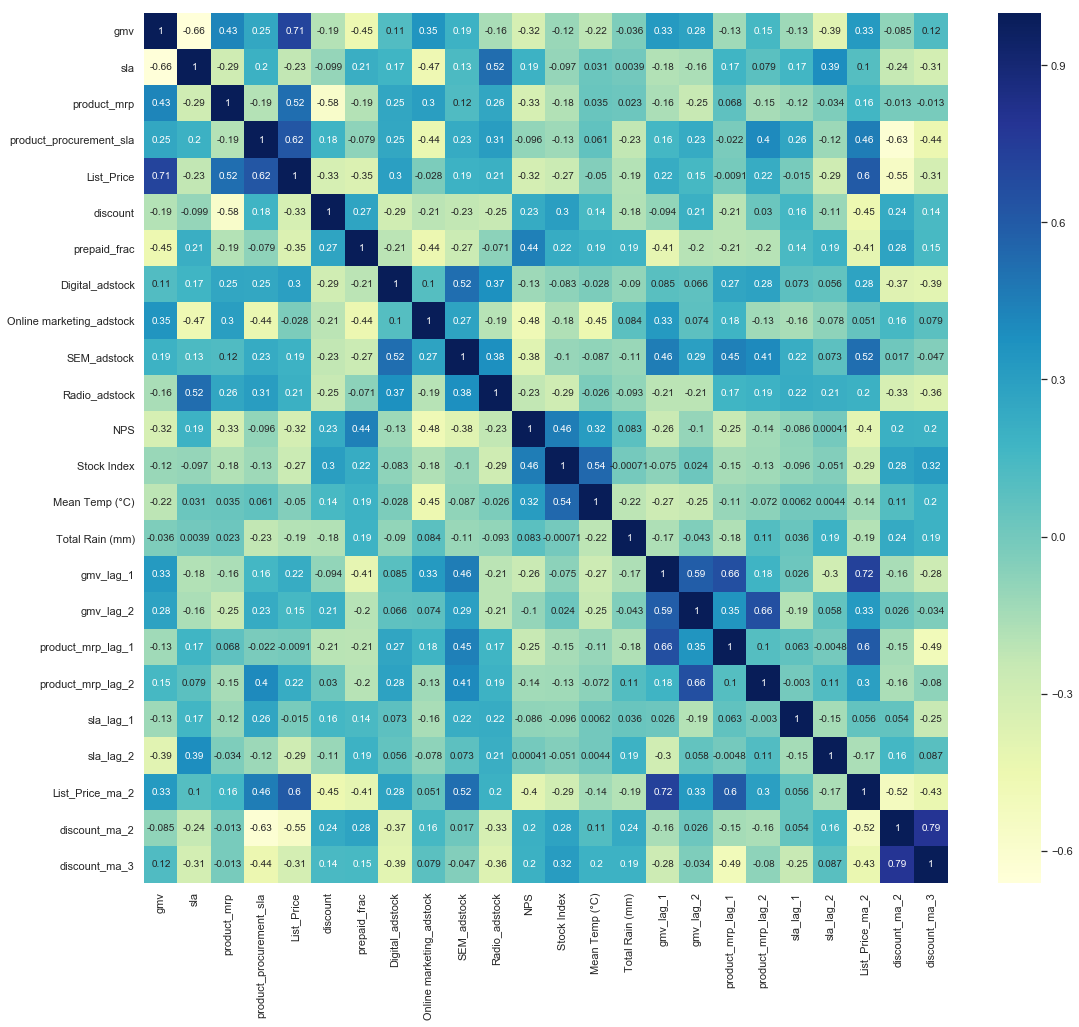

In [115]:
#Again plotting correlation plot for weekly data
 
plt.figure(figsize=(18,16)) 
sns.heatmap(df_ca_dist_mult.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [116]:
# Split the dataset into  test and train
y = df_ca_dist_mult.pop('gmv')
X = df_ca_dist_mult

X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X,y, train_size=0.95, test_size=0.05, random_state=10)

In [117]:
# RFE with 5 features
lm = LinearRegression()
rfe = RFE(lm, 5)

# Fit with 5 features
rfe.fit(X_train_ca, y_train_ca)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True False False  True False False False False False False False False
 False False False False  True False False False  True  True False]
[ 1  9  5  1  6  7 12 13 14 15 17 10  8 19 18 16  1 11  2  3  1  1  4]


In [118]:
list(zip(X_train_ca.columns,rfe.support_,rfe.ranking_))

[('sla', True, 1),
 ('product_mrp', False, 9),
 ('product_procurement_sla', False, 5),
 ('List_Price', True, 1),
 ('discount', False, 6),
 ('prepaid_frac', False, 7),
 ('Digital_adstock', False, 12),
 ('Online marketing_adstock', False, 13),
 ('SEM_adstock', False, 14),
 ('Radio_adstock', False, 15),
 ('NPS', False, 17),
 ('Stock Index', False, 10),
 ('Mean Temp (°C)', False, 8),
 ('Total Rain (mm)', False, 19),
 ('gmv_lag_1', False, 18),
 ('gmv_lag_2', False, 16),
 ('product_mrp_lag_1', True, 1),
 ('product_mrp_lag_2', False, 11),
 ('sla_lag_1', False, 2),
 ('sla_lag_2', False, 3),
 ('List_Price_ma_2', True, 1),
 ('discount_ma_2', True, 1),
 ('discount_ma_3', False, 4)]

In [119]:
## Check the summary of this model using `statsmodels`.
# Subset the features selected by rfe1
col = X_train_ca.columns[rfe.support_]

# Subsetting training data for 5 selected columns
X_train_rfe = X_train_ca[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [120]:
# Fitting the model with 5 variables
lm = sm.OLS(y_train_ca, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     36.08
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           2.47e-14
Time:                        14:29:48   Log-Likelihood:                -59.858
No. Observations:                  49   AIC:                             131.7
Df Residuals:                      43   BIC:                             143.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7497      0.98

In [121]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.21000
4,List_Price_ma_2,4.00000
2,List_Price,3.27000
3,product_mrp_lag_1,2.34000
5,discount_ma_2,1.91000
1,sla,1.41000


In [122]:
# Dropping product_mrp_lag_1 as it has high p-value
col = col.drop('product_mrp_lag_1', 1)

In [123]:
# Let's re-run the model using the selected variables
X_lm2 = sm.add_constant(X_train_ca[col])

lm2 = sm.OLS(y_train_ca, X_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     43.96
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           7.93e-15
Time:                        14:29:49   Log-Likelihood:                -60.816
No. Observations:                  49   AIC:                             131.6
Df Residuals:                      44   BIC:                             141.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5401      0.982     

In [124]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_lm2.values, i) for i in range(X_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.58000
2,List_Price,2.39000
4,discount_ma_2,1.91000
3,List_Price_ma_2,1.78000
1,sla,1.40000


In [125]:
# Dropping List_Price_ma_2 as it has high p-value
col = col.drop('List_Price_ma_2', 1)

In [126]:
# Let's re-run the model using the selected variables
X_lm3 = sm.add_constant(X_train_ca[col])

lm3 = sm.OLS(y_train_ca, X_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     58.05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           1.66e-15
Time:                        14:29:49   Log-Likelihood:                -61.444
No. Observations:                  49   AIC:                             130.9
Df Residuals:                      45   BIC:                             138.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6196      0.981     -1.651

In [127]:
# Check for VIF values
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_lm3.values, i) for i in range(X_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.23000
2,List_Price,1.87000
3,discount_ma_2,1.86000
1,sla,1.34000


In [128]:
# Predictions

X_test_new = X_test_ca[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm3.predict(X_test_new)

# Getting the RMSE
RMSE = math.sqrt(np.mean(np.square((y_pred- y_test_ca))))

# Getting the MSE
MSE = np.mean((y_pred - y_test_ca)**2)

print(RMSE)
print(MSE)


0.7355104575281647
0.5409756331332902


#### Distributed Multiplicative Lag Model is giving R-Square = .795, Adjusted R-Square=.781.

### Conclusions :

1. Both the multiplicative models are giving decent performance but none of the Marketing Spends or Adstock variables.
2. Koyck, and Linear model points to almost same predictor variables with Koyck having slightly better performance.
4. We can see that List Price, Discount and Online Marketing Adstock, SLA, Prepaid Fraction, Digital Adstock are the predictor variables given by various models.